## How well do jobs and skills pay for Data Analysts?
### Methology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast

df = pd.read_csv(r'C:\Users\rsrcy\OneDrive\Desktop\ChayanPersonal\VSC\DA with Python\Python_JobPosting_Project\data_jobs.csv')
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_Ind_US = df[(df['job_country']=='India') | (df['job_country']=='United States')].copy()
df_Ind_US = df_Ind_US.dropna(subset=['salary_year_avg'])

job_titles = df_Ind_US['job_title_short'].value_counts().index[:6].tolist() 
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [17]:
df_Ind_US_top6 = df_Ind_US[df_Ind_US['job_title_short'].isin(job_titles)]

In [18]:
job_order = df_Ind_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

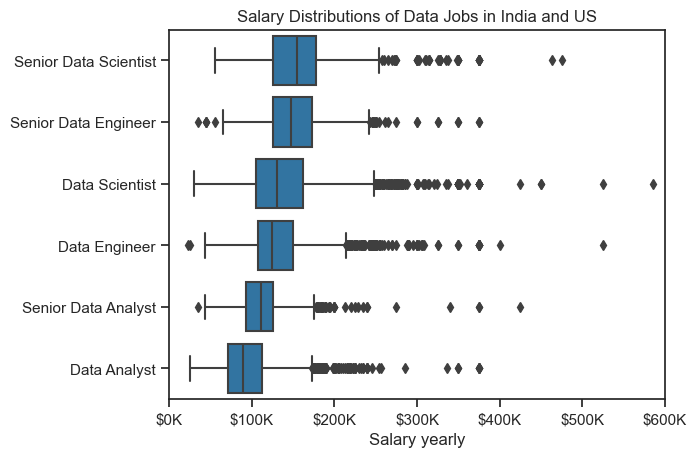

In [21]:
sns.boxplot(data=df_Ind_US_top6, x='salary_year_avg', y='job_title_short', order=job_order, palette=['#1f77b4'])
sns.set_theme(style='ticks')
plt.title('Salary Distributions of Data Jobs in India and US')
plt.xlabel('Salary yearly')
plt.ylabel('')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

In [33]:
df_DA_Ind_US = df[((df['job_country']=='India') | (df['job_country']=='United States')) & (df['job_title_short']=='Data Analyst')].copy()
df_DA_Ind_US = df_DA_Ind_US.dropna(subset=['salary_year_avg'])

In [ ]:
df_DA_Ind_US = df_DA_Ind_US.explode('job_skills')

df_DA_pay = df_DA_Ind_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median', ascending=False).head(10)

df_DA_skill = df_DA_Ind_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False).head(10)
df_DA_skill = df_DA_skill.sort_values(by='median', ascending=False)

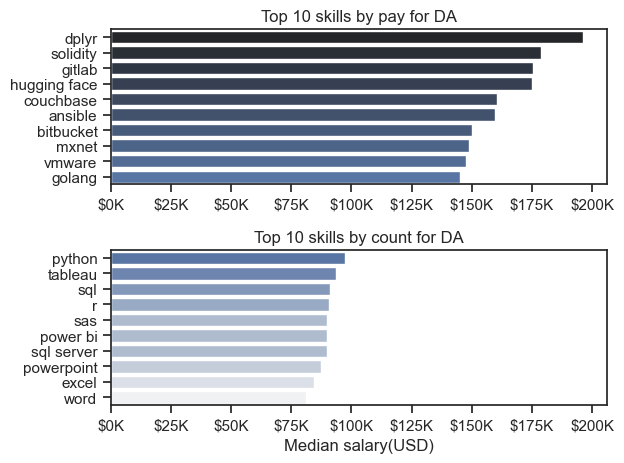

In [45]:
fig, ax = plt.subplots(2,1)

sns.barplot(data=df_DA_pay, x='median', y=df_DA_pay.index, ax=ax[0], hue='median', palette='dark:b_r', dodge=False)
sns.set_theme(style='ticks')
ax[0].set_title('Top 10 skills by pay for DA')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend().remove()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_skill, x='median', y=df_DA_skill.index, ax=ax[1], hue='median', palette='light:b', dodge=False)
sns.set_theme(style='ticks')
ax[1].set_title('Top 10 skills by count for DA')
ax[1].set_xlabel('Median salary(USD)')
ax[1].set_ylabel('')
ax[1].legend().remove()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
plt.show()